# Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("ML_Houses_dataset.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Pesos: The price of the house in Pesos

# WallMat: The material the walls are made of

# Street: Type of road access to property

#        Grvl	Gravel	
#        Pave	Paved
       	
# Alley: Type of alley access to property

#        Grvl	Gravel
#        Pave	Paved
#        NA 	No alley access

In [3]:
data = data[["GrLivArea", 
             "BedroomAbvGr", 
             "KitchenAbvGr", 
             "OverallCond", 
             "Pesos", 
             "Alley", 
             "Street", 
             "WallMat",
             "SalePrice",
             "MoSold"
            ]]
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,WallMat,SalePrice,MoSold
0,1710,3,1,5,4170000.0,NaN,Pave,Concrete,208500,2
1,1262,3,1,8,3630000.0,NaN,Pave,Wood,181500,5
2,1786,3,1,5,4470000.0,NaN,Pave,Wood,223500,9
3,1717,3,1,5,2800000.0,NaN,Pave,Concrete,140000,2
4,2198,4,1,5,5000000.0,NaN,Pave,Concrete,250000,12


# Duplicates

In [5]:
data.shape

(1760, 10)

In [6]:
data.duplicated().sum()

301

In [8]:
data = data.drop_duplicates()
data.shape

(1459, 10)

# Missing Data

In [10]:
data.isnull()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,WallMat,SalePrice,MoSold
0,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,True,False,True,False,False
1456,False,False,False,False,False,True,False,True,False,False
1457,False,False,False,False,False,True,False,True,False,False
1458,False,False,False,False,False,True,False,True,False,False


In [9]:
data.isnull().sum().sort_values(ascending=False) 

WallMat         1454
Alley           1369
Pesos             10
GrLivArea          0
BedroomAbvGr       0
KitchenAbvGr       0
OverallCond        0
Street             0
SalePrice          0
MoSold             0
dtype: int64

In [11]:
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

WallMat         0.996573
Alley           0.938314
Pesos           0.006854
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
Street          0.000000
SalePrice       0.000000
MoSold          0.000000
dtype: float64

In [12]:
data.drop(columns='WallMat', inplace=True) # Drop WallMat column 
data.head()

/var/folders/5v/_w5bgw5s3158lt260286m4ym0000gn/T/ipykernel_16438/1324555170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns='WallMat', inplace=True) # Drop WallMat column


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice,MoSold
0,1710,3,1,5,4170000.0,NaN,Pave,208500,2
1,1262,3,1,8,3630000.0,NaN,Pave,181500,5
2,1786,3,1,5,4470000.0,NaN,Pave,223500,9
3,1717,3,1,5,2800000.0,NaN,Pave,140000,2
4,2198,4,1,5,5000000.0,NaN,Pave,250000,12


In [13]:
import numpy as np

data.Alley.replace(np.nan, "NoAlley", inplace=True) #Replace NaN by "NoAlley"
data.Alley.value_counts()#Check count of each category

/var/folders/5v/_w5bgw5s3158lt260286m4ym0000gn/T/ipykernel_16438/2839748773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Alley.replace(np.nan, "NoAlley", inplace=True) #Replace NaN by "NoAlley"


NoAlley    1369
Grvl         50
Pave         40
Name: Alley, dtype: int64

In [15]:
data.Pesos.mean()

3607272.698412698

In [14]:
# Option 1: Drop rows where Pesos value is missing
# data.dropna(subset=['Pesos'])

# Option 2: Replace missing Pesos values with mean
data.Pesos.replace(np.nan, data.Pesos.mean()) 

0       4170000.0
1       3630000.0
2       4470000.0
3       2800000.0
4       5000000.0
          ...    
1455    3500000.0
1456    4200000.0
1457    5330000.0
1458    2842500.0
1459    2950000.0
Name: Pesos, Length: 1459, dtype: float64

In [17]:
from sklearn.impute import SimpleImputer

# Instantiate a SimpleImputer object with your strategy of choice
imputer = SimpleImputer(strategy="mean") 

# Call the "fit" method on the object
imputer.fit(data[['Pesos']]) 

# Call the "transform" method on the object
data['Pesos'] = imputer.transform(data[['Pesos']]) 

# The mean is stored in the transformer's memory
imputer.statistics_ 

array([3607272.6984127])

# Outliers

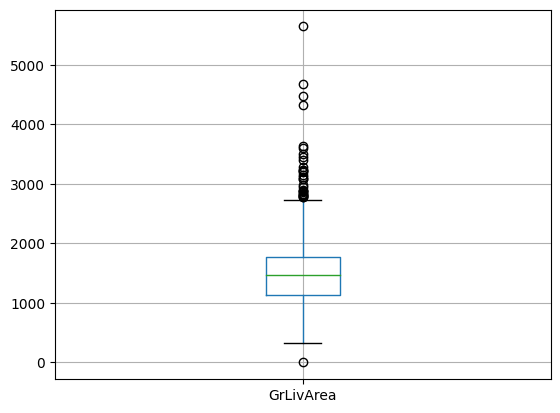

In [18]:
data[['GrLivArea']].boxplot();

In [19]:
data[['GrLivArea']].min()

GrLivArea   -1
dtype: int64

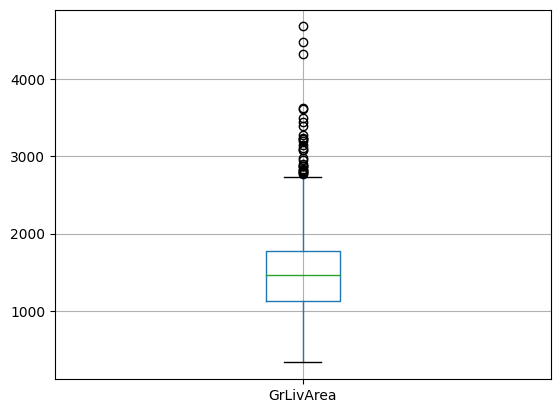

In [20]:
# Saving the indexes corresponding to rows 
# without the absurd -1 value
# and without the mansion
boolean_mask = (data['GrLivArea']>0) & (data['GrLivArea']<5000)

# Applying the boolean filteraing
data = data[boolean_mask].reset_index(drop=True)

# Visualize boxplot again
data[['GrLivArea']].boxplot();

# Scaling

In [21]:
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice,MoSold
0,1710,3,1,5,4170000.0,NoAlley,Pave,208500,2
1,1262,3,1,8,3630000.0,NoAlley,Pave,181500,5
2,1786,3,1,5,4470000.0,NoAlley,Pave,223500,9
3,1717,3,1,5,2800000.0,NoAlley,Pave,140000,2
4,2198,4,1,5,5000000.0,NoAlley,Pave,250000,12


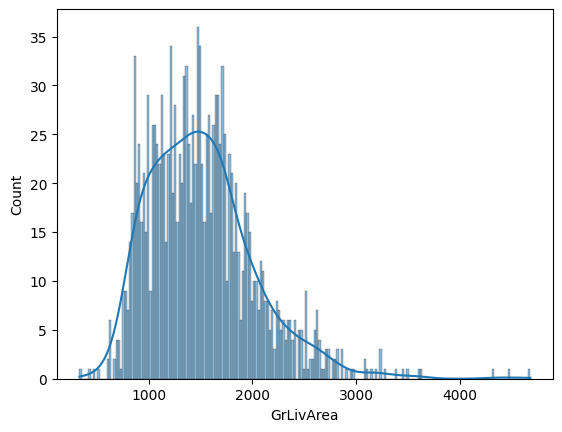

In [22]:
import seaborn as sns
sns.histplot(data['GrLivArea'], bins=200,kde = True);

<AxesSubplot:xlabel='GrLivArea'>

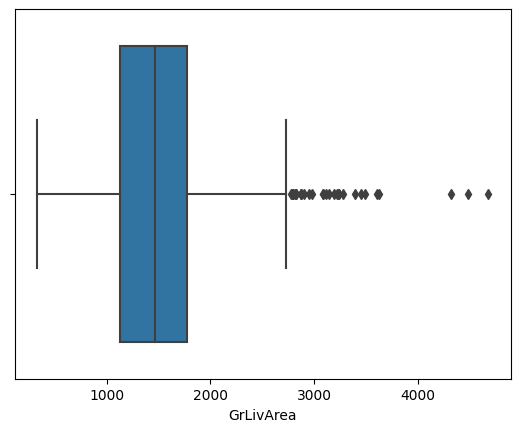

In [23]:
sns.boxplot(data=data, x='GrLivArea')


In [24]:
from sklearn.preprocessing import RobustScaler

# Step 0 - Instanciate Robust Scaler

rb_scaler = RobustScaler() 

# Step 1- Fit the scaler to the `GrLiveArea`
# to "learn" the median value and the IQR

rb_scaler.fit(data[['GrLivArea']]) 

# 2-Scale/Transform
# <-> apply the transformation (value - median) / IQR for every house

data['GrLivArea'] = rb_scaler.transform(data[['GrLivArea']]) 

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Alley,Street,SalePrice,MoSold
0,0.380805,3,1,5,4170000.0,NoAlley,Pave,208500,2
1,-0.312693,3,1,8,3630000.0,NoAlley,Pave,181500,5
2,0.498452,3,1,5,4470000.0,NoAlley,Pave,223500,9
3,0.391641,3,1,5,2800000.0,NoAlley,Pave,140000,2
4,1.136223,4,1,5,5000000.0,NoAlley,Pave,250000,12


# Balancing

# Encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Check unique values for streets (3)
print(f"The unique values for 'Street' are {data.Alley.unique()}")

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output = False) 

# Fit encoder
ohe.fit(data[['Alley']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

The unique values for 'Street' are ['NoAlley' 'Grvl' 'Pave']
The categories detected by the OneHotEncoder are [array(['Grvl', 'NoAlley', 'Pave'], dtype=object)]


In [29]:
# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# # Transform the current "Street" column
data[ohe.get_feature_names_out()] = ohe.transform(data[['Alley']])

# # Drop the column "Street" which has been encoded
data.drop(columns = ["Alley"], inplace = True)

# # Show the dataset
data.head(3)

The column names for the encoded values are ['Alley_Grvl' 'Alley_NoAlley' 'Alley_Pave']


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,Street,SalePrice,MoSold,Alley_Grvl,Alley_NoAlley,Alley_Pave
0,0.380805,3,1,5,4170000.0,Pave,208500,2,0.0,1.0,0.0
1,-0.312693,3,1,8,3630000.0,Pave,181500,5,0.0,1.0,0.0
2,0.498452,3,1,5,4470000.0,Pave,223500,9,0.0,1.0,0.0


In [30]:
from sklearn.preprocessing import OneHotEncoder

# Check unique values for streets (2)
print(f"The unique values for 'Street' are {data.Street.unique()}")

# Instantiate the OneHotEncoder
ohe_binary = OneHotEncoder(sparse_output = False, drop="if_binary") 

# Fit encoder
ohe_binary.fit(data[['Street']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe_binary.categories_}")

The unique values for 'Street' are ['Pave' 'Grvl']
The categories detected by the OneHotEncoder are [array(['Grvl', 'Pave'], dtype=object)]


In [31]:
# Display the generated names
print(f"The column names for the encoded values are {ohe_binary.get_feature_names_out()}")

# Transform the current "Street" column
data[ohe_binary.get_feature_names_out()] = ohe_binary.transform(data[['Street']])

# Drop the column "Street" which has been encoded
data.drop(columns = ["Street"], inplace = True)

# Show the dataset
data.head(3)

The column names for the encoded values are ['Street_Pave']


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,SalePrice,MoSold,Alley_Grvl,Alley_NoAlley,Alley_Pave,Street_Pave
0,0.380805,3,1,5,4170000.0,208500,2,0.0,1.0,0.0,1.0
1,-0.312693,3,1,8,3630000.0,181500,5,0.0,1.0,0.0,1.0
2,0.498452,3,1,5,4470000.0,223500,9,0.0,1.0,0.0,1.0


# Discretizing

In [33]:
data['SalePrice'].min()-1, data['SalePrice'].max()+1

(34899, 755001)

In [35]:
data['SalePrice'].mean()

180991.3836650652

In [34]:
data['SalePriceBinary'] = pd.cut(x = data['SalePrice'],
                                 bins=[data['SalePrice'].min()-1,
                                       data['SalePrice'].mean(),
                                       data['SalePrice'].max()+1], 
                                 labels=['cheap', 'expensive'])

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,Pesos,SalePrice,MoSold,Alley_Grvl,Alley_NoAlley,Alley_Pave,Street_Pave,SalePriceBinary
0,0.380805,3,1,5,4170000.0,208500,2,0.0,1.0,0.0,1.0,expensive
1,-0.312693,3,1,8,3630000.0,181500,5,0.0,1.0,0.0,1.0,expensive
2,0.498452,3,1,5,4470000.0,223500,9,0.0,1.0,0.0,1.0,expensive
3,0.391641,3,1,5,2800000.0,140000,2,0.0,1.0,0.0,1.0,cheap
4,1.136223,4,1,5,5000000.0,250000,12,0.0,1.0,0.0,1.0,expensive


# Feature Creation

# Feature Selection

/var/folders/5v/_w5bgw5s3158lt260286m4ym0000gn/T/ipykernel_16438/3412438786.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


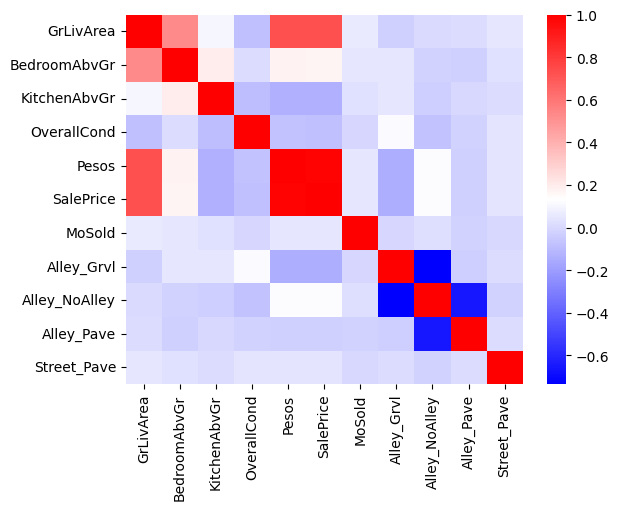

In [36]:
import seaborn as sns

# Heatmap of pairwise correlations
correlation_matrix = data.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [37]:
# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

In [38]:
# Computing the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Showing the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(5*2)

,feature_1,feature_2,correlation,absolute_correlation
59,SalePrice,Pesos,0.990352,0.990352
49,Pesos,SalePrice,0.990352,0.990352
85,Alley_Grvl,Alley_NoAlley,-0.734685,0.734685
95,Alley_NoAlley,Alley_Grvl,-0.734685,0.734685
55,SalePrice,GrLivArea,0.725446,0.725446
5,GrLivArea,SalePrice,0.725446,0.725446
4,GrLivArea,Pesos,0.724512,0.724512
44,Pesos,GrLivArea,0.724512,0.724512
107,Alley_Pave,Alley_NoAlley,-0.654799,0.654799
97,Alley_NoAlley,Alley_Pave,-0.654799,0.654799


In [39]:
data.drop(columns=['Pesos'], inplace=True)


In [40]:
data.head(3)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,SalePrice,MoSold,Alley_Grvl,Alley_NoAlley,Alley_Pave,Street_Pave,SalePriceBinary
0,0.380805,3,1,5,208500,2,0.0,1.0,0.0,1.0,expensive
1,-0.312693,3,1,8,181500,5,0.0,1.0,0.0,1.0,expensive
2,0.498452,3,1,5,223500,9,0.0,1.0,0.0,1.0,expensive


# Modelling

In [45]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Encoding the target
target_encoder = LabelEncoder().fit(data['SalePriceBinary']) 
y = target_encoder.transform(data['SalePriceBinary'])

# Defining the features
X = data.drop(columns=['SalePrice', 'SalePriceBinary'])

# Scaling numerical features
# Notice that we already RobutScaled GrLivArea
minmax_scaler = MinMaxScaler()
X[["BedroomAbvGr","KitchenAbvGr","OverallCond"]] = minmax_scaler.fit_transform(X[["BedroomAbvGr","KitchenAbvGr","OverallCond"]])

# Instantiate model
log_reg = LogisticRegression(max_iter=1000) 

# Scoring on multiple folds aka Cross Validation
scores = cross_val_score(log_reg, X, y, cv=10)
scores.mean()

0.8304440245630609

# Feature importance

In [46]:
from sklearn.model_selection import cross_val_score

# Model to be cross-validated
log_model = LogisticRegression()

# Cross Validation
np.mean(cross_val_score(log_model, X, y , cv=5))

/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8290848750176527

In [47]:
from sklearn.inspection import permutation_importance

# Fit model
log_model = LogisticRegression().fit(X, y) 

# Performs Permutation
permutation_score = permutation_importance(log_model, X, y, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,feature,score decrease
0,GrLivArea,0.298627
1,BedroomAbvGr,0.022787
2,KitchenAbvGr,0.012903
6,Alley_NoAlley,0.009746
5,Alley_Grvl,0.005971
3,OverallCond,0.003638
8,Street_Pave,0.00048
7,Alley_Pave,-0.00048
4,MoSold,-0.001579


In [48]:
# Selecting the strongest features
strongest_features = X[["GrLivArea", "BedroomAbvGr"]]

# Re-instantiating a Logistic Regression
log_reg = LogisticRegression()

# Average accuracy of the cross-validated model
np.mean(cross_val_score(log_reg, strongest_features, y, cv=10))

0.8111903637222484